# Netflix Dataset Analysis - Google Colab



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Dataset.csv to Netflix Dataset.csv


In [4]:
df = pd.read_csv('Netflix Dataset.csv')
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [6]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1512,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,119,2865,1608,334,3


In [7]:
df.shape

(7789, 11)

In [8]:
df['Country'].fillna('Unknown', inplace=True)
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3127625470.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3127625470.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [9]:
#Convert date columns
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['year_added'] = df['Release_Date'].dt.year
df['month_added'] = df['Release_Date'].dt.month

In [10]:
#Extract release year if available
df['Release_Date'] = pd.to_datetime(df['Release_Date'],errors='coerce')

In [11]:
type_count = df['Type'].value_counts()

In [12]:
df = df.dropna(subset=['year_added'])
df['year_added'] = df['year_added'].astype(int)

/tmp/ipython-input-4171264318.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Genre", data=genre_df, palette="viridis")


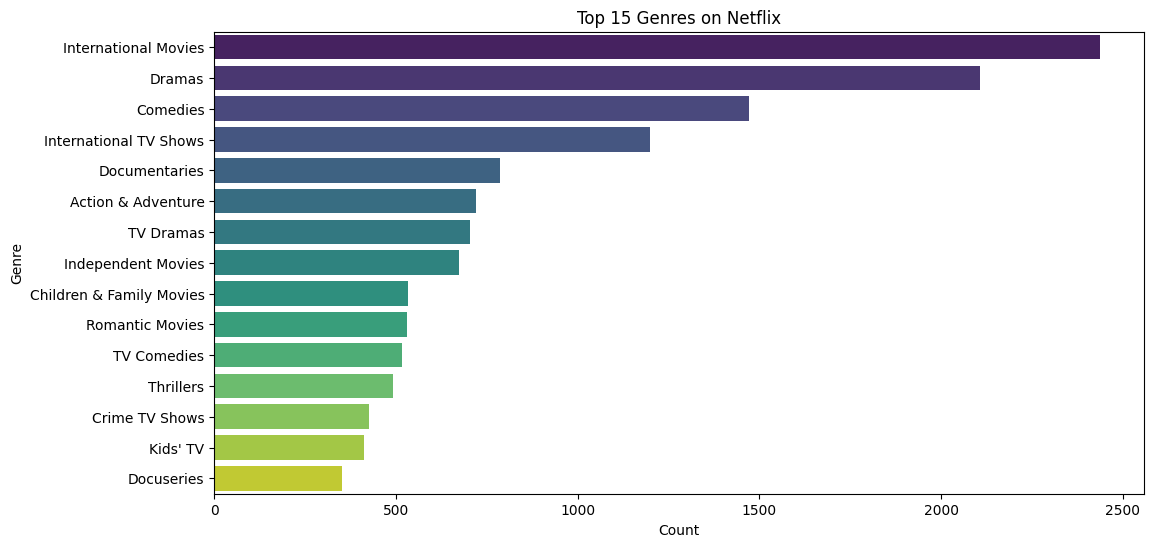

In [13]:
from collections import Counter

# Split 'listed_in' column into individual genres
genre_series = df['Type'].dropna().apply(lambda x: x.split(', '))

# Flatten into a single list
all_genres = [genre for sublist in genre_series for genre in sublist]

# Count top 15 genres
genre_count = Counter(all_genres).most_common(15)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_count, columns=["Genre", "Count"])

# Plot bar chart
plt.figure(figsize=(12,6))
sns.barplot(x="Count", y="Genre", data=genre_df, palette="viridis")
plt.title("Top 15 Genres on Netflix")
plt.show()

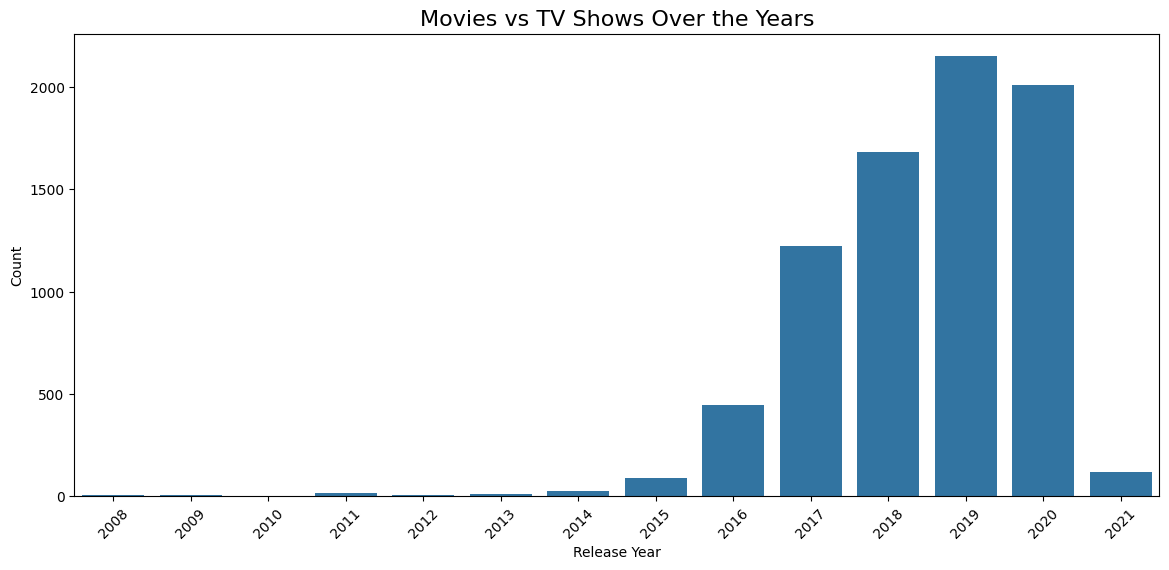

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x="year_added")
plt.title("Movies vs TV Shows Over the Years", fontsize=16)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

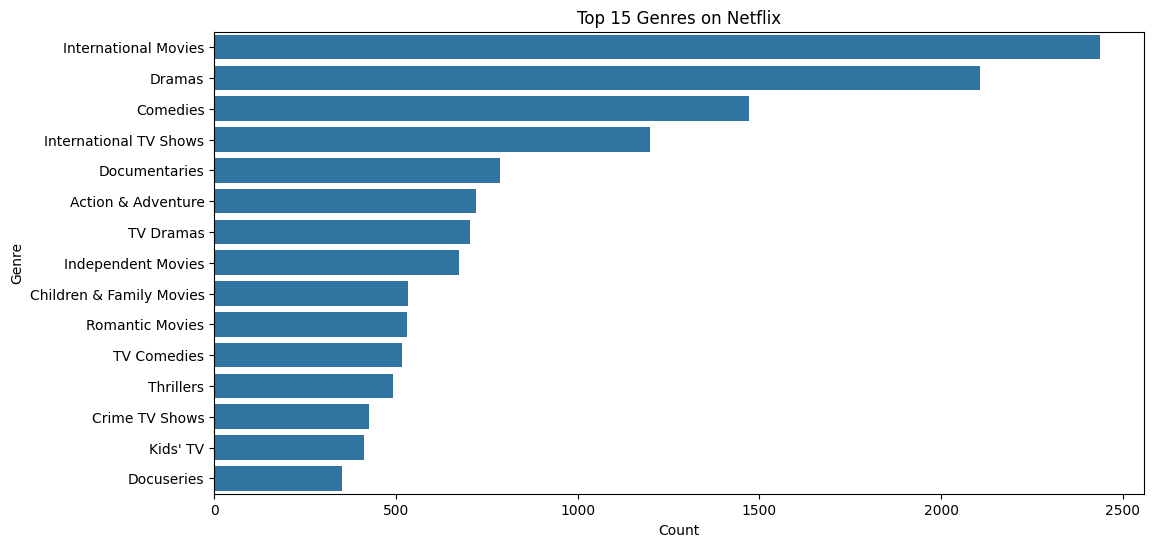

In [15]:
from collections import Counter

# Split genres and count
genre_series = df['Type'].dropna().apply(lambda x: x.split(', '))
all_genres = [genre for sublist in genre_series for genre in sublist]
genre_count = Counter(all_genres).most_common(15)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_count, columns=["Genre", "Count"])

plt.figure(figsize=(12,6))
sns.barplot(x="Count", y="Genre", data=genre_df)
plt.title("Top 15 Genres on Netflix")
plt.show()

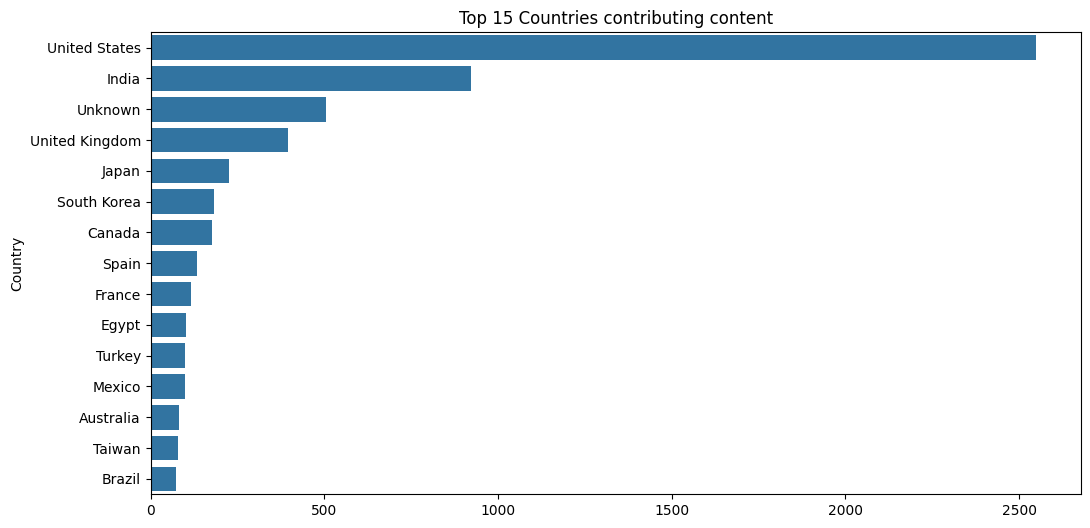

In [16]:
# STEP 6: Country-wise Contribution
country_count = df['Country'].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=country_count.values, y=country_count.index)
plt.title("Top 15 Countries contributing content")
plt.show()


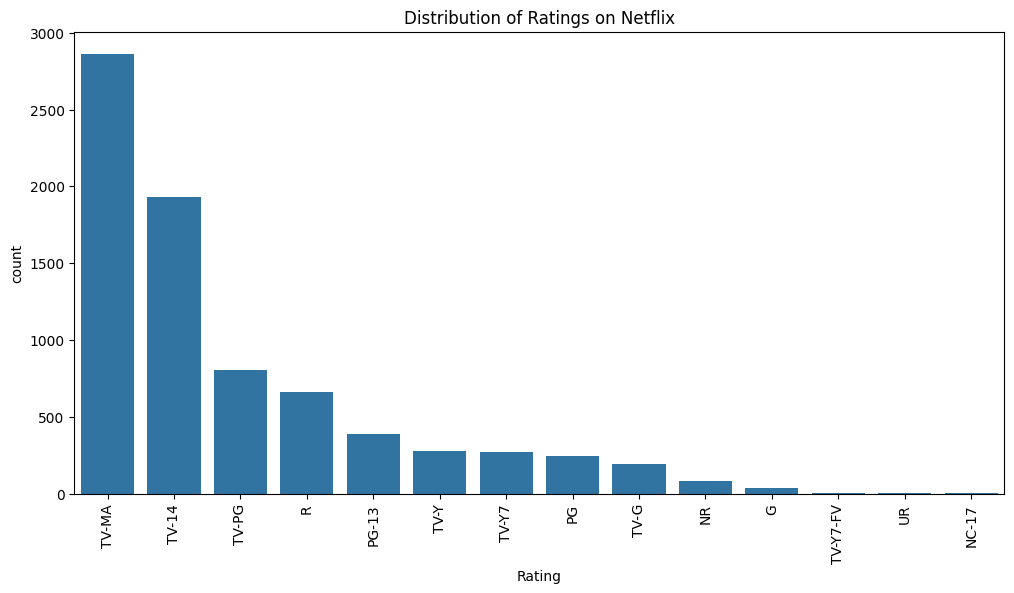

In [17]:
# STEP 7: Ratings Distribution
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Rating", order=df['Rating'].value_counts().index)
plt.title("Distribution of Ratings on Netflix")
plt.xticks(rotation=90)
plt.show()


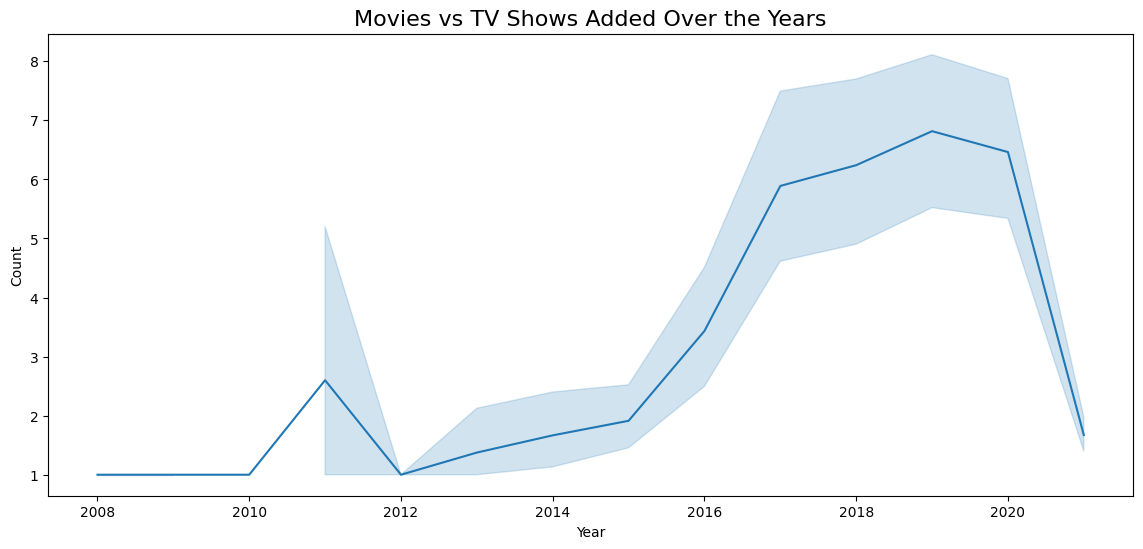

In [18]:
movies_tv = df.groupby(['year_added','Type']).size().reset_index(name='count')
plt.figure(figsize=(14,6))
sns.lineplot(data=movies_tv, x="year_added", y="count")
plt.title("Movies vs TV Shows Added Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


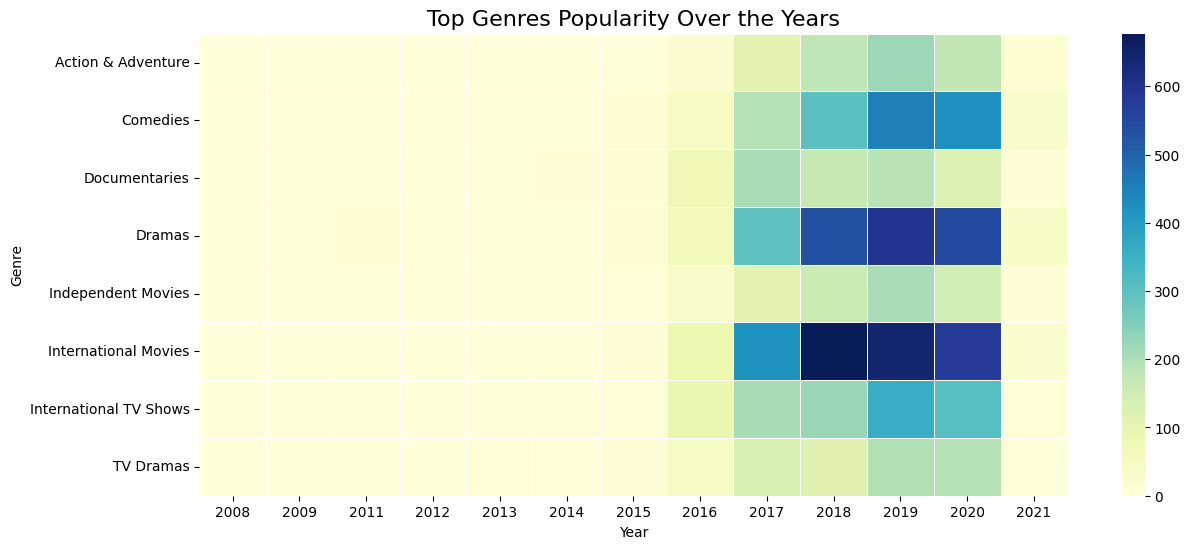

In [19]:
# Explode genres
df_genres = df.assign(genre=df['Type'].str.split(', ')).explode('genre')

genre_trends = df_genres.groupby(['year_added','genre']).size().reset_index(name='count')
top_genres = genre_trends.groupby('genre')['count'].sum().nlargest(8).index
genre_trends = genre_trends[genre_trends['genre'].isin(top_genres)]

pivot_table = genre_trends.pivot(index="genre", columns="year_added", values="count").fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot_table, cmap="YlGnBu", linewidths=.5)
plt.title("Top Genres Popularity Over the Years", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()